### Comparison of Python standalone and Python fccanalysis streering scripts' time output (FCCAnalysis was run using Random Access Memory)

In [6]:
import matplotlib.pyplot as plt
from tools.utilities  import json2dict, json2dict_cpp, json2dict_py, plot_graph, divide_by_threads

In [8]:
data_ZH_100_fcc_wocr = json2dict("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_fccanalysis_wocr.json",  [1, 65, 3])
data_ZH_100_fcc_wcr = json2dict("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_fccanalysis.json", [1, 65, 3])
data_ZH_100_py_wocr = json2dict_py("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_py_wocr.json", [1, 65, 3])
data_ZH_100_py_wcr = json2dict_py("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_py.json", [1, 65, 3])

In [9]:
time_fcc_wocr = data_ZH_100_fcc_wocr["bench_time"]
time_fcc_wcr = data_ZH_100_fcc_wcr["bench_time"]
time_py_wocr = data_ZH_100_py_wocr["time"]
time_py_wcr = data_ZH_100_py_wcr["time"]

real_fcc_wocr = data_ZH_100_fcc_wocr["real_time"]
real_fcc_wcr = data_ZH_100_fcc_wcr["real_time"]
real_py_wocr = data_ZH_100_py_wocr["real_time"]
real_py_wcr = data_ZH_100_py_wcr["real_time"]

n_threads = [i for i in range(1, 65, 3)]

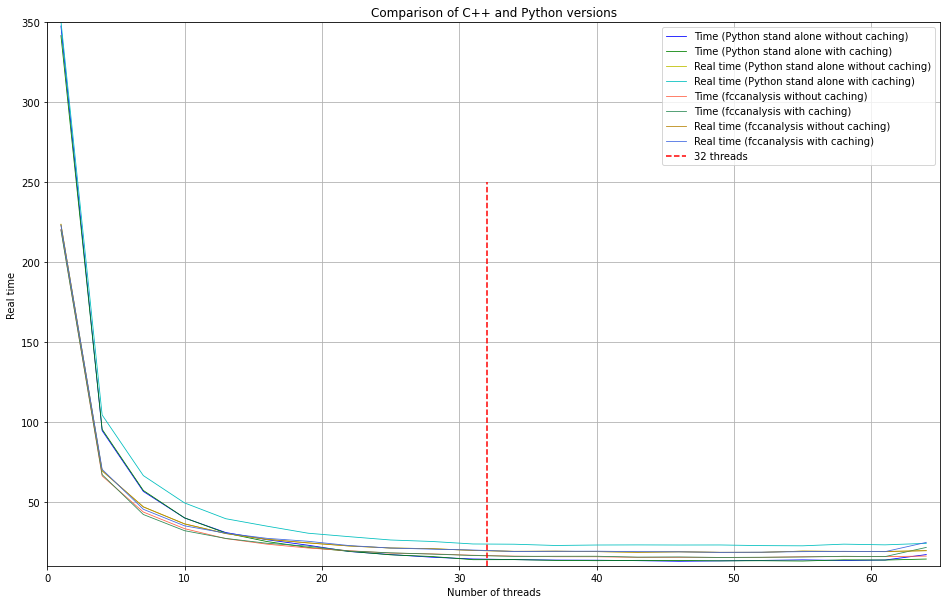

In [18]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)

plt.plot(n_threads, time_py_wcr, color='b', label='Time (Python stand alone without caching)', linewidth=0.8)
plt.plot(n_threads, time_py_wocr, color='g', label='Time (Python stand alone with caching)', linewidth=0.8)
plt.plot(n_threads, real_fcc_wcr, color='y', label='Real time (Python stand alone without caching)', linewidth=0.8)
plt.plot(n_threads, real_py_wocr, color='c', label='Real time (Python stand alone with caching)', linewidth=0.8)

plt.plot(n_threads, time_fcc_wcr, color='tomato', label='Time (fccanalysis without caching)', linewidth=0.8)
plt.plot(n_threads, time_fcc_wocr, color='seagreen', label='Time (fccanalysis with caching)', linewidth=0.8)
plt.plot(n_threads, real_fcc_wcr, color='darkgoldenrod', label='Real time (fccanalysis without caching)', linewidth=0.8)
plt.plot(n_threads, real_fcc_wocr, color='royalblue', label='Real time (fccanalysis with caching)', linewidth=0.8)

plt.vlines(x = 32, ymin = 5, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of C++ and Python versions")
plt.legend()

plt.xlim((0, 65))
plt.ylim((10, 350))
plt.grid()
plt.show()

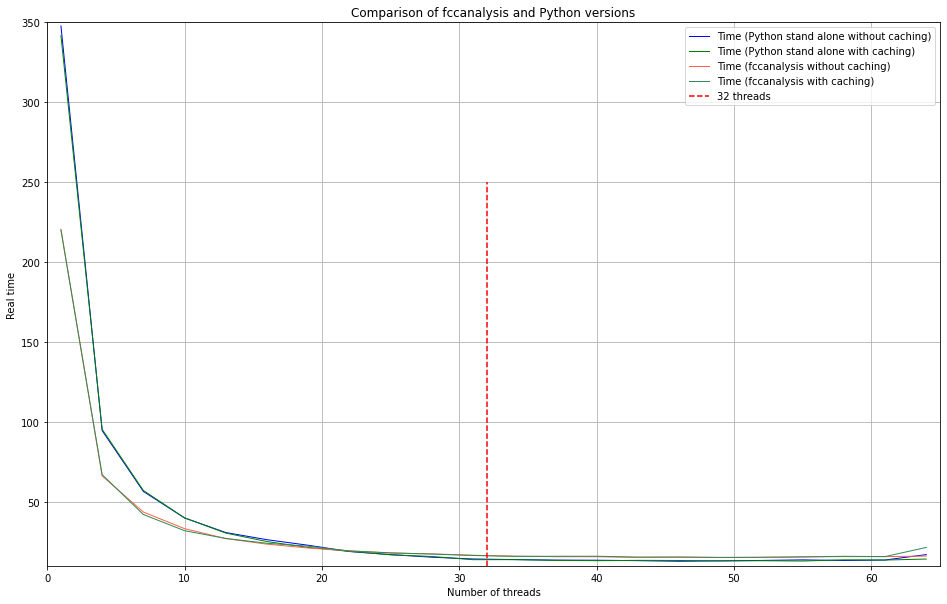

In [22]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)

plt.plot(n_threads, time_py_wcr, color='b', label='Time (Python stand alone without caching)', linewidth=1)
plt.plot(n_threads, time_py_wocr, color='g', label='Time (Python stand alone with caching)', linewidth=1)

plt.plot(n_threads, time_fcc_wcr, color='tomato', label='Time (fccanalysis without caching)', linewidth=1)
plt.plot(n_threads, time_fcc_wocr, color='seagreen', label='Time (fccanalysis with caching)', linewidth=1)

plt.vlines(x = 32, ymin = 5, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of fccanalysis and Python versions")
plt.legend()

plt.xlim((0, 65))
plt.ylim((10, 350))
plt.grid()
plt.show()

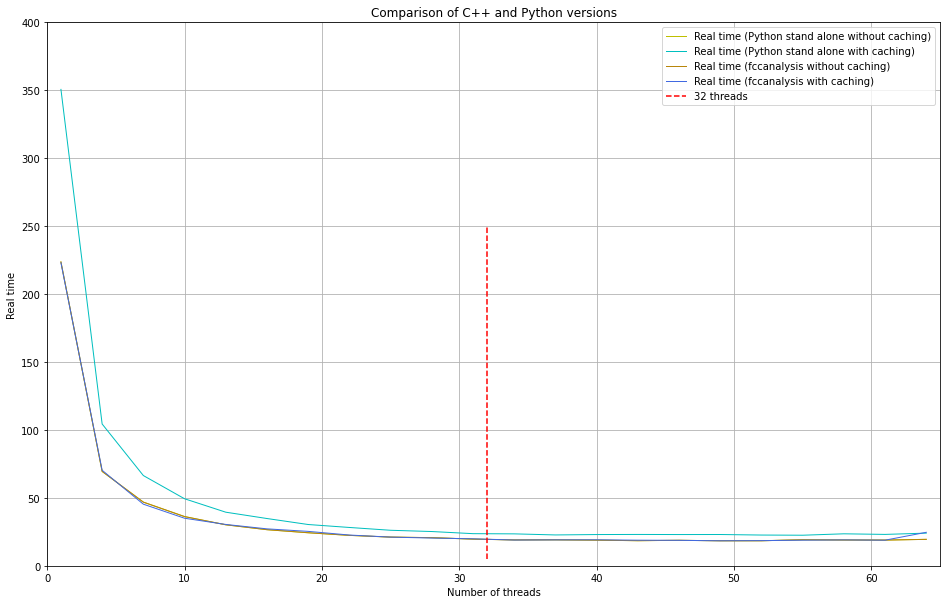

In [20]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)


plt.plot(n_threads, real_fcc_wcr, color='y', label='Real time (Python stand alone without caching)', linewidth=1)
plt.plot(n_threads, real_py_wocr, color='c', label='Real time (Python stand alone with caching)', linewidth=1)

plt.plot(n_threads, real_fcc_wcr, color='darkgoldenrod', label='Real time (fccanalysis without caching)', linewidth=1)
plt.plot(n_threads, real_fcc_wocr, color='royalblue', label='Real time (fccanalysis with caching)', linewidth=1)

plt.vlines(x = 32, ymin = 5, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of C++ and Python versions")
plt.legend()

plt.xlim((0, 65))
plt.ylim((0, 400))
plt.grid()
plt.show()

In [9]:
def compute_nevents(total: int, datatime: list) -> list:
    result = list()
    for time in datatime:
        result.append(total/time)
    return result

In [11]:
total_events = 10000000
nevents_p =  compute_nevents(total_events, data_ZH_100_ram_p["real_time"])
nevents_c =  compute_nevents(total_events, data_ZH_100_ram_c["real_time"])
nevents_c_wo_cache =  compute_nevents(total_events, data_ZH_100_ram_c_wo_cache["real_time"])
nevents_p_bench = data_ZH_100_ram_p["n_events"]

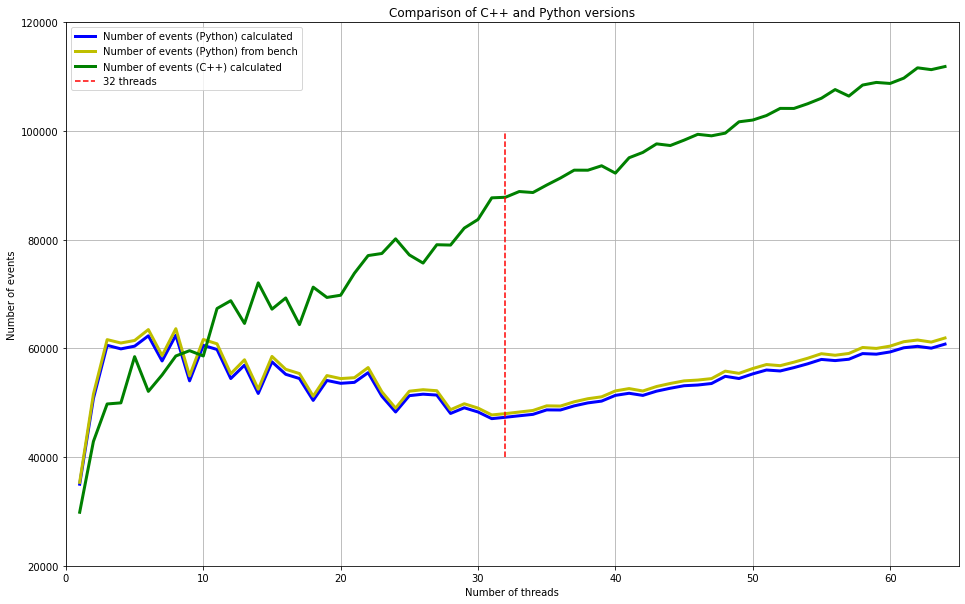

In [14]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, nevents_p, color = 'b', label = 'Number of events (Python) calculated', linewidth = 3)
plt.plot(n_threads, nevents_p_bench, color = 'y', label = 'Number of events (Python) from bench', linewidth = 3)
plt.plot(n_threads, nevents_c, color = 'g', label = 'Number of events (C++) calculated', linewidth = 3)
# plt.plot(n_threads, nevents_c_wo_cache, color = 'pink', label = 'Number of events (C++) calculated wo cache', linewidth = 3)
plt.vlines(x = 32, ymin = 40_000, ymax = 100_000, color = 'r', label = '32 threads', linestyles = "dashed")
plt.xlabel("Number of threads")
plt.ylabel("Number of events")
plt.title("Comparison of C++ and Python versions")
plt.legend()
plt.xlim((0, 65))
plt.ylim((20_000, 120_000))
plt.grid()
plt.show()

#### Only fccanalysis version without cache realising (second attempt)

In [24]:
data_ZH_100_fcc_wocr_2 = json2dict("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_fccanalysis_wocr_v2.json",  [1, 65, 3])
time_fcc_wocr_2 = data_ZH_100_fcc_wocr_2["bench_time"]

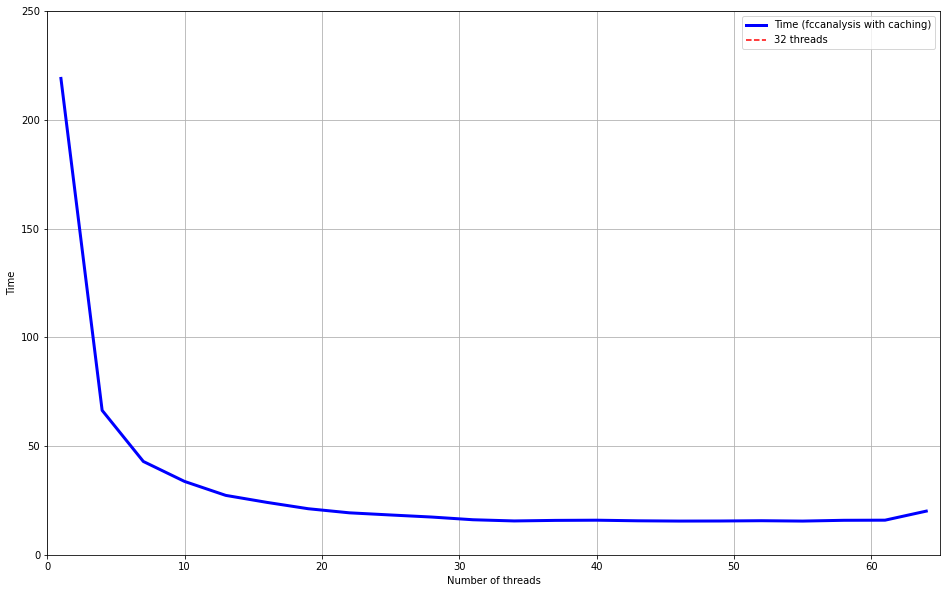

In [28]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, time_fcc_wocr_2, color = 'b', label = 'Time (fccanalysis with caching)', linewidth = 3)
plt.vlines(x = 32, ymin = 40_000, ymax = 100_000, color = 'r', label = '32 threads', linestyles = "dashed")
plt.xlabel("Number of threads")
plt.ylabel("Time")
plt.title("")
plt.legend()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.grid()
plt.show()